<a href="https://colab.research.google.com/github/Cry069/Unsupervised-learning/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [9]:
df.drop('Name', axis=1)

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


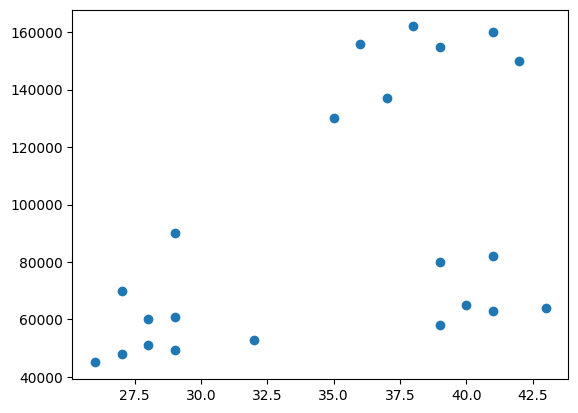

In [12]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

In [13]:
model = KMeans(n_clusters=3)
model.fit(df[['Age', 'Income($)']])
y_pred = model .predict(df[['Age', 'Income($)']])

In [14]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


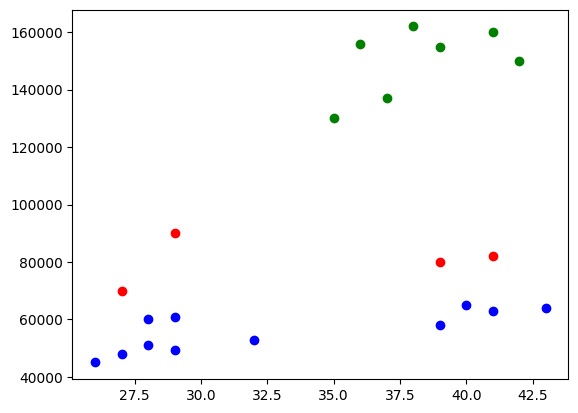

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1["Age"], df1["Income($)"], color='green')
plt.scatter(df2["Age"], df2["Income($)"], color='red')
plt.scatter(df3["Age"], df3["Income($)"], color='blue')
plt.show()

In [ ]:
# Ours scaling is fked.

In [21]:
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']]) # double [[]] here since MinMaxScaler expects 2d array


In [22]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


In [26]:
km = KMeans(n_clusters = 3)
km.fit(df[['Age','Income($)']])
y_pred = km.predict(df[['Age','Income($)']]) # Also double bracket here :c

In [28]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


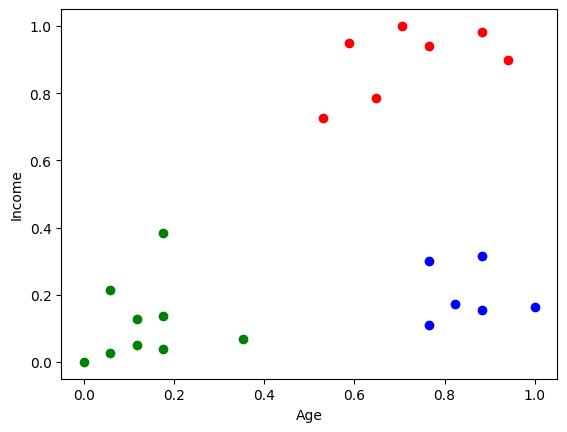

In [31]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1["Age"], df1["Income($)"], color='green')
plt.scatter(df2["Age"], df2["Income($)"], color='red')
plt.scatter(df3["Age"], df3["Income($)"], color='blue')
plt.ylabel('Income')
plt.xlabel('Age')
plt.show()

In [41]:
# Elbow method
sse = []

for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit(df[['Age','Income($)']])
    sse.append(model.inertia_)

In [42]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.39548454779375586,
 0.22020960864009395,
 0.20650563234794894,
 0.16199189075190906,
 0.11123550695239098]

Text(0, 0.5, 'Squared Sum Error')

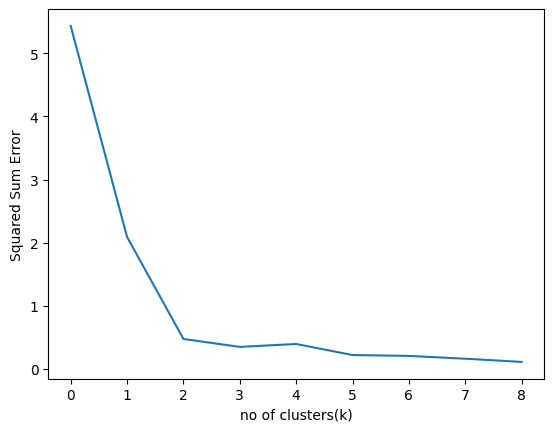

In [43]:
plt.plot(sse)
plt.xlabel('no of clusters(k)')
plt.ylabel('Squared Sum Error')

In [44]:
# Here elbow is at 3.
